### Week6: Computer Vision

### 6.2 Assignment

a.

Using section 5.2 in Deep Learning with Python as a guide, create a ConvNet model that classifies images CIFAR10 small images classification dataset. Do not use dropout or data-augmentation in this part. Save the model, predictions, metrics, and validation plots in the dsc650/assignments/assignment06/results directory.

b.

Using section 5.2 in Deep Learning with Python as a guide, create a ConvNet model that classifies images CIFAR10 small images classification dataset. This time includes dropout and data-augmentation. Save the model, predictions, metrics, and validation plots in the dsc650/assignments/assignment06/results directory.

https://bellevue-university.github.io/dsc650/lessons/12-week/week06/

In [110]:
import keras
keras.__version__

'2.4.3'

In [111]:
import os, shutil

In [113]:
from keras import models, layers
import tensorflow as tf
(trainx, trainy), (testx, testy) = tf.keras.datasets.cifar10.load_data()
print(type(trainx))

<class 'numpy.ndarray'>


As a sanity check, let's count how many pictures we have in each training split (train/validation/test):

So we have indeed 2000 training images, and then 1000 validation images and 1000 test images. In each split, there is the same number of samples from each class: this is a balanced binary classification problem, which means that classification accuracy will be an appropriate measure of success.
### Building our network

We've already built a small convnet for MNIST in the previous example, so you should be familiar with them. We will reuse the same general structure: our convnet will be a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers.

However, since we are dealing with bigger images and a more complex problem, we will make our network accordingly larger: it will have one more Conv2D + MaxPooling2D stage. This serves both to augment the capacity of the network, and to further reduce the size of the feature maps, so that they aren't overly large when we reach the Flatten layer. Here, since we start from inputs of size 150x150 (a somewhat arbitrary choice), we end up with feature maps of size 7x7 right before the Flatten layer.

Note that the depth of the feature maps is progressively increasing in the network (from 32 to 128), while the size of the feature maps is decreasing (from 148x148 to 7x7). This is a pattern that you will see in almost all convnets.

Since we are attacking a binary classification problem, we are ending the network with a single unit (a Dense layer of size 1) and a sigmoid activation. This unit will encode the probability that the network is looking at one class or the other.


https://github.com/fchollet/deep-learning-with-python-notebooks/issues/16

In [114]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

In [115]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [116]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(
        # This is the target directory
        trainx,
        trainy,
        batch_size=20)

validation_generator = test_datagen.flow(
        # This is the target directory
        testx,
        testy,
        batch_size=20)

In [117]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 32, 32, 3)
labels batch shape: (20, 1)


In [118]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 2s 17ms/step - loss: 103.2029 - acc: 0.0760 - val_loss: 107.0017 - val_acc: 0.0020
Epoch 2/30
100/100 [==============================] - 1s 14ms/step - loss: 106.4257 - acc: 0.0925 - val_loss: 103.0178 - val_acc: 0.3960
Epoch 3/30
100/100 [==============================] - 1s 14ms/step - loss: 103.5934 - acc: 0.0880 - val_loss: 105.8729 - val_acc: 0.0570
Epoch 4/30
100/100 [==============================] - 1s 14ms/step - loss: 104.6295 - acc: 0.0935 - val_loss: 104.6065 - val_acc: 0.0870
Epoch 5/30
100/100 [==============================] - 1s 14ms/step - loss: 105.7002 - acc: 0.0815 - val_loss: 104.4453 - val_acc: 0.0810
Epoch 6/30
100/100 [==============================] - 1s 14ms/step - loss: 102.6723 - acc: 0.0920 - val_loss: 106.2643 - val_acc: 0.0000e+00
Epoch 7/30
100/100 [==============================] - 1s 14ms/step - loss: 104.0768 - acc: 0.1330 - val_loss: 103.9156 - val_acc: 0.0080
Epoch 8/30
100/100 [=================

It is good practice to always save your models after training:

In [119]:
model.save('things-10.h5')

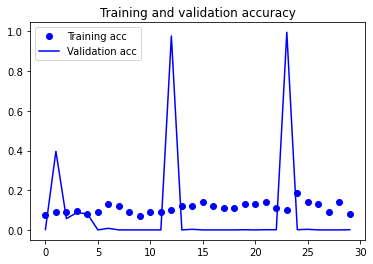

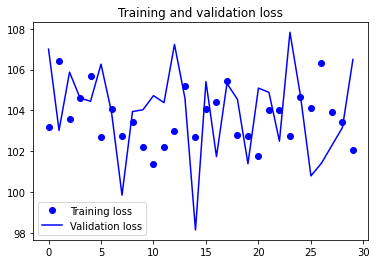

In [120]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [129]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

